In [21]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [27]:
#get the data
link = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv"
df = pd.read_csv(link)
gbc = ''

In [65]:
#define some funtions to allow us to easily call the testing methods as well as to edit them
def test(est, depth, loss):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=543)
    gbc = ensemble.GradientBoostingClassifier(n_estimators=est, max_depth=depth, loss=loss)
    gbc.fit(x_train, y_train)
    predict_train = gbc.predict(x_train)
    predict_test = gbc.predict(x_test)
    precision = precision_score(y_test, predict_test)
    recall = recall_score(y_test, predict_test)
    print('The precision score is {:.2f}'.format(precision))
    print('The recall score is {:.2f}'.format(recall))
    cm = confusion_matrix(y_test, predict_test)
    plot_confusion_matrix(cm,[0,1],False)
    plt.show()
    
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
dropped_df = df.dropna()

In [48]:
dummy_df = pd.get_dummies(dropped_df['cntry'])

In [87]:
y = dropped_df['partner'] - 1
x = dropped_df.drop(['partner', 'cntry'], axis=1).merge(dummy_df, left_index=True, right_index=True)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=543)
gbc = ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=2, loss='deviance')
gbc.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=2)

In [71]:
predict_train = gbc.predict(x_train)
predict_test = gbc.predict(x_test)
precision = precision_score(y_test, predict_test)
recall = recall_score(y_test, predict_test)
print('The precision score is {:.2f}'.format(precision))
print('The recall score is {:.2f}'.format(recall))

The precision score is 0.79
The recall score is 0.45


Confusion matrix, without normalization


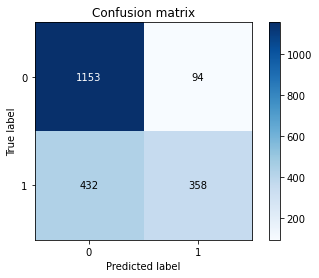

In [72]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)
plt.show()

Normalized confusion matrix


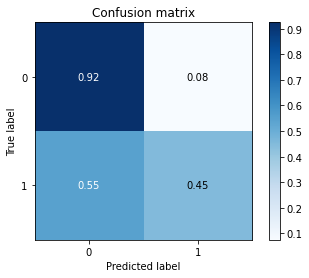

In [73]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)
plt.show()

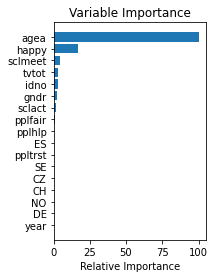

In [76]:
#find feature importances
feature_importance = gbc.feature_importances_
#scale them
feature_importance = 100.0 * (feature_importance / feature_importance.max())
#sort them
sorted_idx = np.argsort(feature_importance)
#position and plot them
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [77]:
x_train.corr()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
idno,1.000000,-0.002859,0.009535,0.009116,0.010140,0.003743,-0.005143,-0.016442,0.003564,0.007934,0.029736,-0.029216,-0.026196,0.999967,-0.039178,-0.019389,-0.031798
year,-0.002859,1.000000,-0.027471,-0.008961,0.002484,-0.032373,-0.010746,-0.029830,-0.004469,0.005567,-0.004457,0.008974,-0.003712,-0.002739,0.002433,-0.010797,0.002516
tvtot,0.009535,-0.027471,1.000000,-0.148569,-0.116490,-0.064474,-0.116339,-0.077438,-0.083646,0.013004,0.249555,-0.170527,0.220376,0.009757,0.036007,-0.020185,-0.054784
ppltrst,0.009116,-0.008961,-0.148569,1.000000,0.603946,0.460532,0.244969,0.131755,0.139663,-0.027501,-0.027171,0.036383,-0.229516,0.007473,-0.155044,0.218020,0.134902
pplfair,0.010140,0.002484,-0.116490,0.603946,1.000000,0.487434,0.260521,0.101077,0.131745,0.022864,0.009590,0.056362,-0.226642,0.008676,-0.177199,0.190481,0.163461
pplhlp,0.003743,-0.032373,-0.064474,0.460532,0.487434,1.000000,0.230727,0.086074,0.089329,0.043138,0.045583,0.078580,-0.175398,0.002556,-0.214805,0.155216,0.172803
happy,-0.005143,-0.010746,-0.116339,0.244969,0.260521,0.230727,1.000000,0.180608,0.179201,-0.021602,-0.043804,0.106478,-0.217404,-0.005955,-0.074901,0.106613,0.074843
sclmeet,-0.016442,-0.029830,-0.077438,0.131755,0.101077,0.086074,0.180608,1.000000,0.278788,0.020238,-0.203479,-0.022401,-0.185349,-0.017111,0.013327,0.072196,0.104379
sclact,0.003564,-0.004469,-0.083646,0.139663,0.131745,0.089329,0.179201,0.278788,1.000000,-0.029593,-0.055952,-0.005589,-0.036604,0.003001,-0.110553,0.086999,0.078471
gndr,0.007934,0.005567,0.013004,-0.027501,0.022864,0.043138,-0.021602,0.020238,-0.029593,1.000000,0.019582,0.015952,0.015076,0.008255,0.004734,-0.036517,-0.000778


In [93]:
y = dropped_df['partner'] - 1
x = dropped_df[['agea', 'happy', 'sclmeet']]

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=543)
gbc = ensemble.GradientBoostingClassifier(n_estimators=1000, max_depth=4, loss='deviance', min_samples_split=6)
gbc.fit(x_train, y_train)
predict_train = gbc.predict(x_train)
predict_test = gbc.predict(x_test)
precision = precision_score(y_test, predict_test)
recall = recall_score(y_test, predict_test)
print('The precision score is {:.2f}'.format(precision))
print('The recall score is {:.2f}'.format(recall))

The precision score is 0.73
The recall score is 0.52


In [88]:
y = dropped_df['partner'] - 1
x = dropped_df.drop(['partner', 'cntry'], axis=1).merge(dummy_df, left_index=True, right_index=True)

In only using the precision and recall to judge (which were the only two percentage based items shown in the lesson), most of the models were around 70% accuracy and 55% recall. Increasing the estimators had the most effect. Changing the depth, loss, and min_samples seemed to have little to no effect. If I were to do a deep dive, I would probably see if the age with respect to spouse had any effect or not, perhaps by multiplying the spouse value by 100, adding it to happy, and checking it that way.